<a href="https://colab.research.google.com/github/nklsrmy/CC_MACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics

import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [8]:
# put your answer here
dataframe = pd.read_excel("friends.xlsx")

In [9]:
dataframe.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Nayeon,1,Yes,2,69,0
1,Jeongyeon,1,No,2,98,0
2,Momo,1,Yes,4,45,0
3,Sana,1,Yes,3,77,1
4,Jihyo,1,No,1,85,1


In [10]:
dataframe.drop(columns='Name', inplace=True)
dataframe.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,Yes,2,69,0
1,1,No,2,98,0
2,1,Yes,4,45,0
3,1,Yes,3,77,1
4,1,No,1,85,1


1. Display the summary of all the features of the dataset using `.info()`

In [11]:
# put your answer here
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Post/Share Frequently?       49 non-null     int64 
 1   Active in social media?      49 non-null     object
 2   Replies to comments?         49 non-null     int64 
 3   Number of friends/followers  49 non-null     int64 
 4   Personality                  49 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.0+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [12]:
# put your answer here
dataframe['Personality'].value_counts()

,count
Personality,
1,26
0,23


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [13]:
# put your answer here
X = dataframe.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [14]:
# put your answer here
y = dataframe['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [15]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39, 4)
(39,)
(10, 4)
(10,)


In [23]:
enc = OrdinalEncoder()
X_train_encoded = enc.fit_transform(X_train)

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [45]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=3)

7. Train the model using the `.fit()`

In [46]:
# put your answer here
knn.fit(X_train_encoded, y_train)

KNeighborsClassifier(n_neighbors=3)

8. Test the model using the `.predict()`

In [47]:
# put your answer here
y_pred = knn.predict(X_train_encoded)

## Evaluate the model

9. Create a confusion matrix

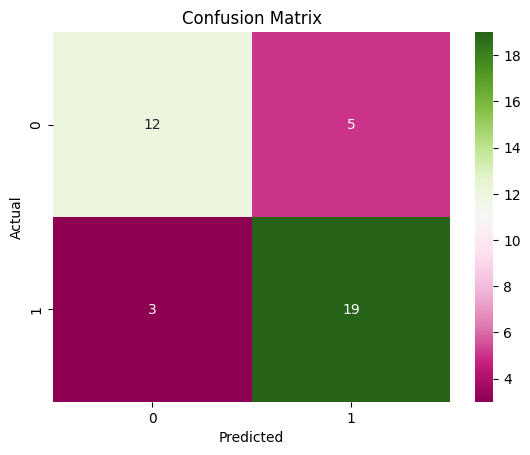

In [62]:
# put your answer here
y_pred = knn.predict(X_train_encoded)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="PiYG")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

10. Display the accuracy

In [49]:
# put your answer here
metrics.accuracy_score(y_train, y_pred)

0.7948717948717948

11. Display the precision

In [50]:
# put your answer here
precision = precision_score(y_train, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8        0.79166667]


12. Display the recall

In [51]:
# put your answer here
recall = recall_score(y_train, y_pred, average=None)
print("Recall:", recall)

Recall: [0.70588235 0.86363636]


13. Display the f1-score

In [52]:
# put your answer here
f1 = f1_score(y_train, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.75       0.82608696]


In [66]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.79      0.86      0.83        22

    accuracy                           0.79        39
   macro avg       0.80      0.78      0.79        39
weighted avg       0.80      0.79      0.79        39



In [67]:
knn.predict([[0, 1, 0, 1000]])

array([1])